In [83]:
import pandas as pd

df = pd.read_csv('C:/Lohit/New folder/Updated_Starbucks_Order_Data_with_Missing_Values.csv')

df.head()

,worker_id,department,location,order_detail,shift,season,detailed_order,office_location,assigned_starbucks,adjusted_order_time,adjusted_pickup_time,prep_time_minutes,time_slot,expected_wait_time_minutes
0,1,Sales,Starbucks_2,Latte - Oat Milk - Sweetener - Large - Caramel...,Morning,Fall,Small - Almond Milk - Extra Sweetener - Flavor...,Office_E,Starbucks_3,2025-03-08 08:57:00,2025-03-08 09:10:00,4.0,Morning Rush (8:00 AM - 10:00 AM),6
1,2,Marketing,Starbucks_3,Frappuccino - Soy Milk - Extra Sweetener - Med...,Evening,Fall,Large - Almond Milk - Sweetener - None,Office_E,Starbucks_3,2025-03-08 16:26:00,2025-03-08 16:32:00,5.0,Midday (10:00 AM - 12:00 PM),6
2,3,Engineering,Starbucks_1,Latte - Coconut Milk - Extra Sweetener - Small...,Morning,Winter,Small - Regular - No Sugar - None,Office_E,Starbucks_3,2025-03-08 09:42:00,2025-03-08 09:54:00,4.0,NaN,6
3,4,Support,Starbucks_2,Latte - Coconut Milk - Sweetener - Small - None,Evening,Winter,Large - Regular - Extra Sweetener - None,Office_A,Starbucks_2,2025-03-08 16:52:00,2025-03-08 17:11:00,3.0,Afternoon (12:00 PM - 2:00 PM),5
4,5,Finance,Starbucks_2,Mocha - Regular - Sweetener - Large - Flavored...,Evening,Summer,Small - Oat Milk - No Sugar - None,Office_A,Starbucks_1,2025-03-08 16:57:00,2025-03-08 17:14:00,5.0,Afternoon (12:00 PM - 2:00 PM),7


In [84]:
# Convert the columns to datetime using the correct format
df['adjusted_order_time'] = pd.to_datetime(df['adjusted_order_time'], format='%Y-%m-%d %H:%M:%S')
df['adjusted_pickup_time'] = pd.to_datetime(df['adjusted_pickup_time'], format='%Y-%m-%d %H:%M:%S')

# Extract the time part
df['order_time_only'] = df['adjusted_order_time'].dt.strftime('%H:%M')
df['pickup_time_only'] = df['adjusted_pickup_time'].dt.strftime('%H:%M')

new_df = df.drop(columns=['adjusted_order_time','adjusted_pickup_time'])

In [85]:
new_df.head()

,worker_id,department,location,order_detail,shift,season,detailed_order,office_location,assigned_starbucks,prep_time_minutes,time_slot,expected_wait_time_minutes,order_time_only,pickup_time_only
0,1,Sales,Starbucks_2,Latte - Oat Milk - Sweetener - Large - Caramel...,Morning,Fall,Small - Almond Milk - Extra Sweetener - Flavor...,Office_E,Starbucks_3,4.0,Morning Rush (8:00 AM - 10:00 AM),6,08:57,09:10
1,2,Marketing,Starbucks_3,Frappuccino - Soy Milk - Extra Sweetener - Med...,Evening,Fall,Large - Almond Milk - Sweetener - None,Office_E,Starbucks_3,5.0,Midday (10:00 AM - 12:00 PM),6,16:26,16:32
2,3,Engineering,Starbucks_1,Latte - Coconut Milk - Extra Sweetener - Small...,Morning,Winter,Small - Regular - No Sugar - None,Office_E,Starbucks_3,4.0,NaN,6,09:42,09:54
3,4,Support,Starbucks_2,Latte - Coconut Milk - Sweetener - Small - None,Evening,Winter,Large - Regular - Extra Sweetener - None,Office_A,Starbucks_2,3.0,Afternoon (12:00 PM - 2:00 PM),5,16:52,17:11
4,5,Finance,Starbucks_2,Mocha - Regular - Sweetener - Large - Flavored...,Evening,Summer,Small - Oat Milk - No Sugar - None,Office_A,Starbucks_1,5.0,Afternoon (12:00 PM - 2:00 PM),7,16:57,17:14


In [86]:
new_df.describe()

,worker_id,prep_time_minutes,expected_wait_time_minutes
count,10000.00000,9500.000000,10000.000000
mean,5000.50000,5.076421,6.582200
std,2886.89568,1.186056,1.290353
min,1.00000,3.000000,4.000000
25%,2500.75000,4.000000,6.000000
50%,5000.50000,5.000000,6.000000
75%,7500.25000,6.000000,7.000000
max,10000.00000,7.000000,9.000000


In [87]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   worker_id                   10000 non-null  int64  
 1   department                  10000 non-null  object 
 2   location                    10000 non-null  object 
 3   order_detail                9000 non-null   object 
 4   shift                       10000 non-null  object 
 5   season                      9000 non-null   object 
 6   detailed_order              10000 non-null  object 
 7   office_location             10000 non-null  object 
 8   assigned_starbucks          10000 non-null  object 
 9   prep_time_minutes           9500 non-null   float64
 10  time_slot                   9500 non-null   object 
 11  expected_wait_time_minutes  10000 non-null  int64  
 12  order_time_only             10000 non-null  object 
 13  pickup_time_only            9300

In [88]:
new_df['order_time_only'] = pd.to_datetime(new_df['order_time_only'])
new_df['pickup_time_only'] = pd.to_datetime(new_df['pickup_time_only'])

print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   worker_id                   10000 non-null  int64         
 1   department                  10000 non-null  object        
 2   location                    10000 non-null  object        
 3   order_detail                9000 non-null   object        
 4   shift                       10000 non-null  object        
 5   season                      9000 non-null   object        
 6   detailed_order              10000 non-null  object        
 7   office_location             10000 non-null  object        
 8   assigned_starbucks          10000 non-null  object        
 9   prep_time_minutes           9500 non-null   float64       
 10  time_slot                   9500 non-null   object        
 11  expected_wait_time_minutes  10000 non-null  int64      

C:\Users\lohit\AppData\Local\Temp\ipykernel_14936\1765754775.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df['order_time_only'] = pd.to_datetime(new_df['order_time_only'])
C:\Users\lohit\AppData\Local\Temp\ipykernel_14936\1765754775.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df['pickup_time_only'] = pd.to_datetime(new_df['pickup_time_only'])


In [89]:
missing_Values = new_df.isnull().sum().sort_values(ascending=False)

missing_Values

season                        1000
order_detail                  1000
pickup_time_only               700
prep_time_minutes              500
time_slot                      500
department                       0
shift                            0
location                         0
worker_id                        0
detailed_order                   0
assigned_starbucks               0
office_location                  0
expected_wait_time_minutes       0
order_time_only                  0
dtype: int64

In [90]:
def impute_time_slot(row):
    if pd.isna(row['time_slot']):
        hour = row['order_time_only'].hour
        if 8 <= hour <10:
            return 'Morning Rush (8:00 AM - 10:00 AM)'
        elif 10<= hour <12:
            return 'Midday (10:00 AM - 12:00 PM)'
        elif 12 <= hour < 14:
            return 'Afternoon (12:00 PM - 2:00 PM)'
        elif 14 <= hour < 16:
            return 'Afternoon (2:00 PM - 4:00 PM)'
        elif 16 <= hour < 18:
            return 'Evening (4:00 PM - 6:00 PM)'
        else:
            return 'Late Evening (6:00 PM - 8:00 PM)'
    return row['time_slot']

new_df['time_slot'] = new_df.apply(impute_time_slot,axis=1)

prep_time_median = new_df['prep_time_minutes'].median()
new_df['prep_time_minutes'].fillna(prep_time_median, inplace=True)

new_df['pickup_time_only'] = new_df.apply(
    lambda row: row['order_time_only'] + pd.to_timedelta(row['prep_time_minutes'], unit='m') 
    if pd.isna(row['pickup_time_only']) else row['pickup_time_only'], axis=1)

C:\Users\lohit\AppData\Local\Temp\ipykernel_14936\2123811333.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['prep_time_minutes'].fillna(prep_time_median, inplace=True)


In [91]:
# Drop 'order_detail'Since we have deatiled order
new_df = new_df.drop(columns=['order_detail'])

In [92]:
new_df.isnull().sum().sort_values(ascending=False)

season                        1000
worker_id                        0
department                       0
location                         0
shift                            0
detailed_order                   0
office_location                  0
assigned_starbucks               0
prep_time_minutes                0
time_slot                        0
expected_wait_time_minutes       0
order_time_only                  0
pickup_time_only                 0
dtype: int64

In [93]:
# Get the mode (most frequent value) of the 'season' column
season_mode = new_df['season'].mode()[0]

# Fill the missing values in 'season' with the mode
new_df['season'].fillna(season_mode, inplace=True)


C:\Users\lohit\AppData\Local\Temp\ipykernel_14936\339321845.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['season'].fillna(season_mode, inplace=True)


In [94]:
new_df['season'].value_counts()

season
Summer    3301
Spring    2238
Winter    2231
Fall      2230
Name: count, dtype: int64

In [95]:
summer_data = new_df[new_df['season'] == 'Summer']
winter_data = new_df[new_df['season'] == 'Winter']
spring_data = new_df[new_df['season'] == 'Spring']
Fall_data = new_df[new_df['season'] == 'Fall']

In [98]:
summer_data.isnull().sum()

worker_id                     0
department                    0
location                      0
shift                         0
season                        0
detailed_order                0
office_location               0
assigned_starbucks            0
prep_time_minutes             0
time_slot                     0
expected_wait_time_minutes    0
order_time_only               0
pickup_time_only              0
dtype: int64

In [101]:
# 1.1 Display basic info about the dataframe
print(summer_data.info())

# 1.2 Summary statistics for numerical columns
print(summer_data.describe())

# 1.3 Summary statistics for categorical columns
print(summer_data.describe(include=['object']))

# 1.4 Check for missing values (already handled, but for sanity check)
print(summer_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 3301 entries, 4 to 9993
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   worker_id                   3301 non-null   int64         
 1   department                  3301 non-null   object        
 2   location                    3301 non-null   object        
 3   shift                       3301 non-null   object        
 4   season                      3301 non-null   object        
 5   detailed_order              3301 non-null   object        
 6   office_location             3301 non-null   object        
 7   assigned_starbucks          3301 non-null   object        
 8   prep_time_minutes           3301 non-null   float64       
 9   time_slot                   3301 non-null   object        
 10  expected_wait_time_minutes  3301 non-null   int64         
 11  order_time_only             3301 non-null   datetime64[ns]
 1

In [103]:
# Example feature: Time of Day
summer_data.loc[:, 'order_hour'] = summer_data['order_time_only'].dt.hour

# Example feature: Time difference between order and pickup
summer_data.loc[:, 'waiting_time'] = (summer_data['pickup_time_only'] - summer_data['order_time_only']).dt.total_seconds() / 60

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

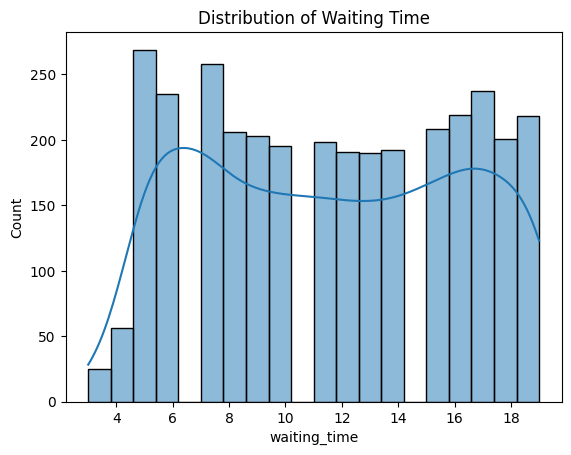

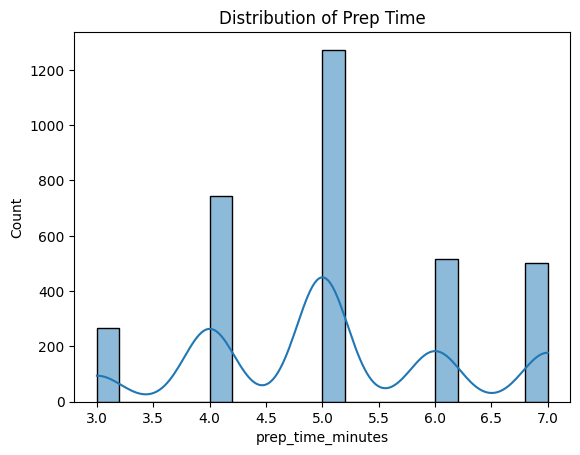

In [106]:
# Visualizing the distribution of waiting time
sns.histplot(summer_data['waiting_time'], kde=True, bins=20)
plt.title("Distribution of Waiting Time")
plt.show()

# Visualizing the distribution of prep_time_minutes
sns.histplot(summer_data['prep_time_minutes'], kde=True, bins=20)
plt.title("Distribution of Prep Time")
plt.show()


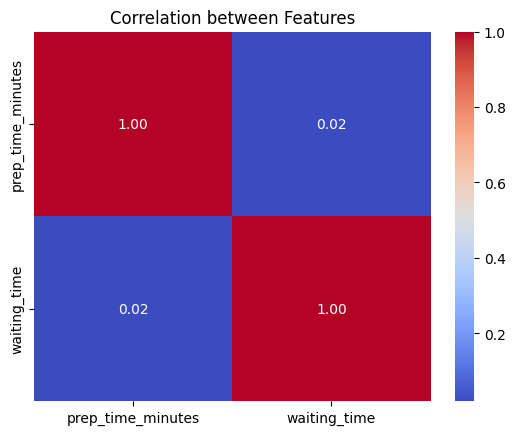

In [111]:
# Correlation matrix for numerical features
correlation_matrix = summer_data[['prep_time_minutes', 'waiting_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Features")
plt.show()


In [113]:
# Use .loc[] to modify the original DataFrame
summer_data.loc[:, 'order_hour'] = summer_data['order_time_only'].dt.hour
summer_data.loc[:, 'day_of_week'] = summer_data['order_time_only'].dt.dayofweek
summer_data.loc[:, 'time_of_day'] = summer_data['order_hour'].apply(
    lambda x: 'Morning' if 6 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Evening')
)

# Check the updated DataFrame
print(summer_data[['order_hour', 'day_of_week', 'time_of_day']].head())


    order_hour  day_of_week time_of_day
4           16            6   Afternoon
9           17            6   Afternoon
14           8            6     Morning
19           9            6     Morning
20           8            6     Morning


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale numerical features
numerical_features = ['prep_time_minutes', 'order_hour', 'day_of_week', 'waiting_time']
# Use .loc to modify the DataFrame safely and avoid warnings
summer_data.loc[:, numerical_features] = scaler.fit_transform(summer_data[numerical_features])

# Check the transformed values
print(summer_data[numerical_features].head())



    prep_time_minutes  order_hour  day_of_week  waiting_time
4           -0.064704    1.063734          0.0      1.174781
9           -0.940064    1.344825          0.0      0.520863
14          -0.940064   -1.184993          0.0     -1.004946
19          -0.940064   -0.903902          0.0     -0.133055
20          -1.815424   -1.184993          0.0      1.610727


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select features and target
X = summer_data[['prep_time_minutes', 'order_hour', 'day_of_week', 'season_encoded', 'shift_encoded', 'time_of_day_encoded']]
y = summer_data['waiting_time']  # Target variable: waiting time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


KeyError: "['season_encoded', 'shift_encoded', 'time_of_day_encoded'] not in index"

In [117]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical features
summer_data['season_encoded'] = label_encoder.fit_transform(summer_data['season'])
summer_data['shift_encoded'] = label_encoder.fit_transform(summer_data['shift'])
summer_data['time_of_day_encoded'] = label_encoder.fit_transform(summer_data['time_of_day'])

# Check the encoding
print(summer_data[['season', 'season_encoded', 'shift', 'shift_encoded', 'time_of_day', 'time_of_day_encoded']].head())


    season  season_encoded    shift  shift_encoded time_of_day  \
4   Summer               0  Evening              1   Afternoon   
9   Summer               0  Evening              1   Afternoon   
14  Summer               0  Morning              2     Morning   
19  Summer               0  Morning              2     Morning   
20  Summer               0  Morning              2     Morning   

    time_of_day_encoded  
4                     0  
9                     0  
14                    1  
19                    1  
20                    1  


C:\Users\lohit\AppData\Local\Temp\ipykernel_14936\3616062150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['season_encoded'] = label_encoder.fit_transform(summer_data['season'])
C:\Users\lohit\AppData\Local\Temp\ipykernel_14936\3616062150.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['shift_encoded'] = label_encoder.fit_transform(summer_data['shift'])
C:\Users\lohit\AppData\Local\Temp\ipykernel_14936\3616062150.py:9: SettingWithCopyWarning: 
A value is trying to be set on